# contarct de maintenanace 

## importation des librairies et packages nécessaires 

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from datetime import datetime
import matplotlib.pyplot as plt


In [3]:
# Charger les données
data = pd.read_csv("resultats_clustering.csv")
data

,order_purchase_timestamp,customer_unique_id,price,freight_value,payment_value,review_score,delivery_time,delivery_delay,purchase_month,delai_livraison,...,purchase_day_Saturday,purchase_day_Sunday,purchase_day_Thursday,purchase_day_Tuesday,purchase_day_Wednesday,livraison_a_temps_False,livraison_a_temps_True,livraison_apres_limite_False,livraison_apres_limite_True,cluster
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99,8.720,18.12,4.0,8.0,-8.0,10.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4
1,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,118.70,22.760,141.46,4.0,13.0,-6.0,7.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
2,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,159.90,19.220,179.12,5.0,9.0,-18.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
3,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00,27.200,72.20,5.0,13.0,-13.0,11.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
4,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,19.90,8.720,28.62,5.0,2.0,-10.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94434,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,72.00,13.080,85.08,5.0,8.0,-11.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4
94435,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,174.90,20.100,195.00,4.0,22.0,-2.0,2.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2
94436,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,205.99,33.145,271.01,5.0,24.0,-6.0,8.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
94437,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,179.99,33.145,347.20,2.5,17.0,-21.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [4]:
# Vérifier les types et NaNs (résumé)
print("Types des colonnes :\n", data.dtypes)
print("\nNaNs par colonne :\n", data.isna().sum()[data.isna().sum() > 0])

Types des colonnes :
 order_purchase_timestamp         object
customer_unique_id               object
price                           float64
freight_value                   float64
payment_value                   float64
review_score                    float64
delivery_time                   float64
delivery_delay                  float64
purchase_month                  float64
delai_livraison                 float64
delai_total_traitement          float64
customer_state_AC               float64
customer_state_AL               float64
customer_state_AM               float64
customer_state_AP               float64
customer_state_BA               float64
customer_state_CE               float64
customer_state_DF               float64
customer_state_ES               float64
customer_state_GO               float64
customer_state_MA               float64
customer_state_MG               float64
customer_state_MS               float64
customer_state_MT               float64
customer_state_PA 

In [6]:
data.columns 

Index(['order_purchase_timestamp', 'customer_unique_id', 'price',
       'freight_value', 'payment_value', 'review_score', 'delivery_time',
       'delivery_delay', 'purchase_month', 'delai_livraison',
       'delai_total_traitement', 'customer_state_AC', 'customer_state_AL',
       'customer_state_AM', 'customer_state_AP', 'customer_state_BA',
       'customer_state_CE', 'customer_state_DF', 'customer_state_ES',
       'customer_state_GO', 'customer_state_MA', 'customer_state_MG',
       'customer_state_MS', 'customer_state_MT', 'customer_state_PA',
       'customer_state_PB', 'customer_state_PE', 'customer_state_PI',
       'customer_state_PR', 'customer_state_RJ', 'customer_state_RN',
       'customer_state_RO', 'customer_state_RR', 'customer_state_RS',
       'customer_state_SC', 'customer_state_SE', 'customer_state_SP',
       'customer_state_TO', 'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'purchase_day_Frida

 ## Préparation des données temporelles
Convertir la colonne order_purchase_timestamp en datetime et extraire les périodes pertinentes (mois, trimestre, année).



In [7]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['year_month'] = data['order_purchase_timestamp'].dt.to_period('M')


## Évolution de la répartition des clusters dans le temps
Analyser la distribution des clusters au fil des mois :

AttributeError: module 'matplotlib' has no attribute 'title'

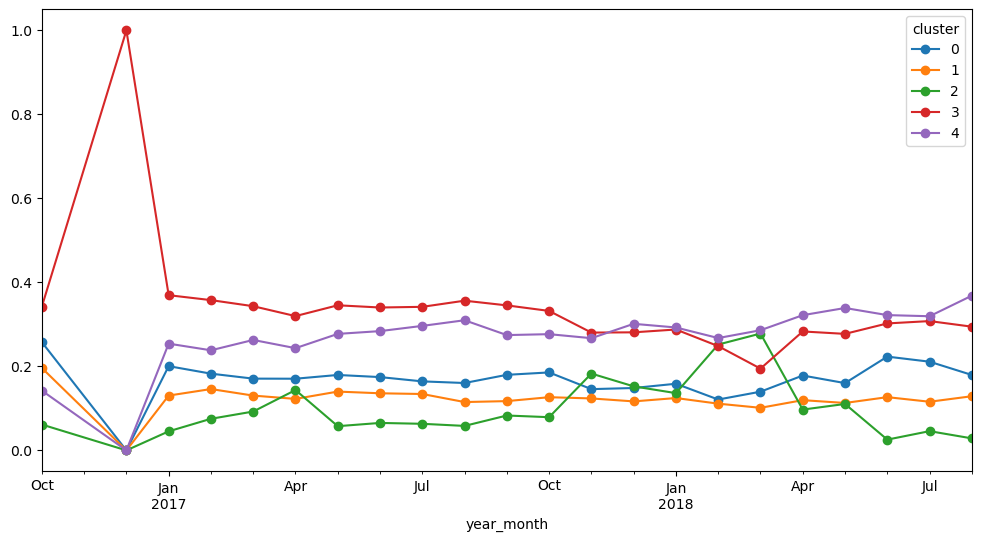

In [10]:
cluster_evolution = data.groupby(['year_month', 'cluster']).size().unstack(fill_value=0)
cluster_evolution_percent = cluster_evolution.div(cluster_evolution.sum(axis=1), axis=0)

cluster_evolution_percent.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Évolution de la répartition des clusters dans le temps")
plt.ylabel("Proportion des segments")
plt.xlabel("Mois")
plt.grid(True)
plt.show()


## Mesure de la stabilité
Utiliser un indicateur comme l'entropie ou l'indice de Jaccard pour mesurer la stabilité des clusters d’un mois à l’autre :

AttributeError: module 'matplotlib' has no attribute 'ylabel'

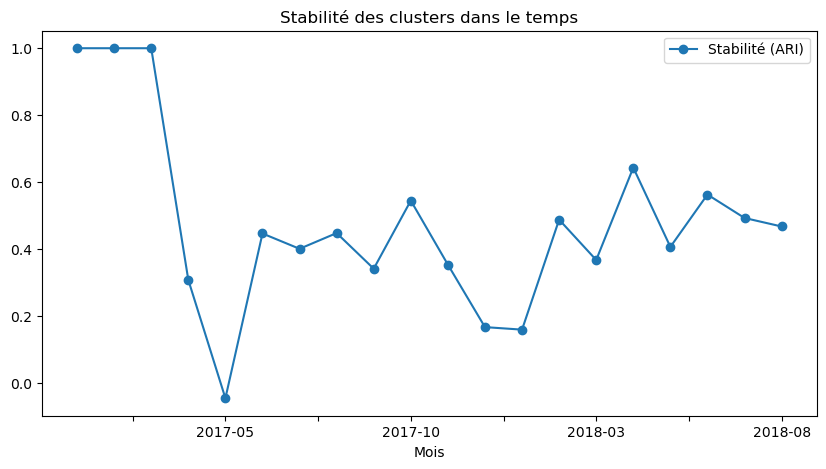

In [14]:
from sklearn.metrics import adjusted_rand_score

stability_scores = []
months = sorted(data['year_month'].unique())

for i in range(1, len(months)):
    prev = data[data['year_month'] == months[i - 1]]
    curr = data[data['year_month'] == months[i]]

    # Ne garder qu'une ligne par client pour chaque mois
    prev_unique = prev.drop_duplicates(subset='customer_unique_id')
    curr_unique = curr.drop_duplicates(subset='customer_unique_id')

    # Intersection des clients
    common_ids = set(prev_unique['customer_unique_id']) & set(curr_unique['customer_unique_id'])

    if len(common_ids) > 0:
        # Sélection alignée sur les clients communs
        prev_seg = prev_unique[prev_unique['customer_unique_id'].isin(common_ids)] \
            .set_index('customer_unique_id').loc[sorted(common_ids), 'cluster']
        curr_seg = curr_unique[curr_unique['customer_unique_id'].isin(common_ids)] \
            .set_index('customer_unique_id').loc[sorted(common_ids), 'cluster']

        # Calcul de la stabilité avec ARI
        score = adjusted_rand_score(prev_seg, curr_seg)
        stability_scores.append((str(months[i]), score))
    else:
        stability_scores.append((str(months[i]), np.nan))  # aucun client commun

# Affichage des résultats
df_stability = pd.DataFrame(stability_scores, columns=['Mois', 'Stabilité (ARI)'])
df_stability.set_index('Mois').plot(marker='o', figsize=(10, 5), title="Stabilité des clusters dans le temps")
plt.ylabel("Indice ARI")
plt.xlabel("Mois")
plt.ylim(-0.1, 1.05)
plt.grid(True)
plt.show()


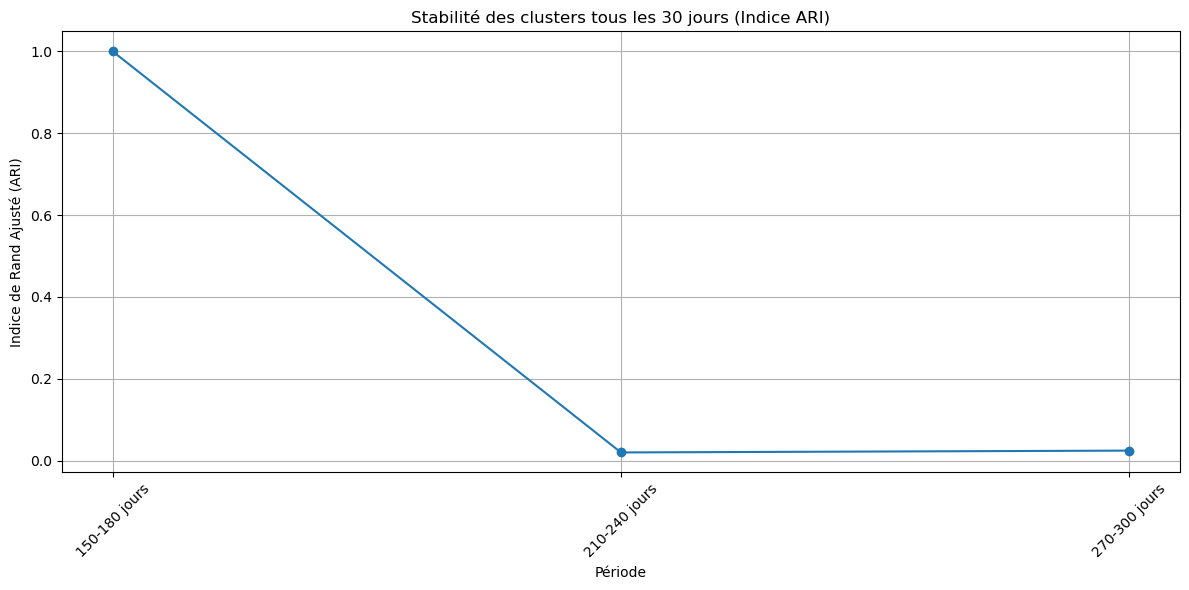

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# 1. Conversion des dates
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# 2. Création d'une colonne représentant le nombre de jours écoulés depuis la première commande
start_date = data['order_purchase_timestamp'].min()
data['jour_cluster'] = (data['order_purchase_timestamp'] - start_date).dt.days

# 3. Définition des périodes de 30 jours
max_jour = data['jour_cluster'].max()
periode_step = 30
periodes = list(range(0, (max_jour // periode_step) + 2))  # +2 pour inclure la dernière période

# 4. Calcul de la stabilité (ARI) entre périodes consécutives
stability_scores = []

for i in range(1, len(periodes)):
    # Définir les périodes
    jour_debut = periodes[i-1] * periode_step
    jour_fin = periodes[i] * periode_step

    # Clients des deux périodes
    prev = data[data['jour_cluster'] <= jour_debut]
    curr = data[(data['jour_cluster'] > jour_debut) & (data['jour_cluster'] <= jour_fin)]

    # Identifier les clients communs
    common_users = list(set(prev['customer_unique_id']).intersection(set(curr['customer_unique_id'])))
    if len(common_users) < 2:
        continue

    # Extraction des segments (clusters)
    prev_seg = prev.set_index('customer_unique_id').loc[common_users]['cluster']
    curr_seg = curr.set_index('customer_unique_id').loc[common_users]['cluster']

    # Nettoyage des index
    prev_seg = prev_seg.sort_index()
    curr_seg = curr_seg.sort_index()

    # S'assurer que les index sont exactement les mêmes
    common_index = prev_seg.index.intersection(curr_seg.index)
    prev_seg = prev_seg.loc[common_index]
    curr_seg = curr_seg.loc[common_index]

    # Vérification finale
    if len(prev_seg) < 2 or len(prev_seg) != len(curr_seg):
        continue

    # Calcul de l'indice de Rand ajusté
    score = adjusted_rand_score(prev_seg, curr_seg)
    period_label = f"{jour_debut}-{jour_fin} jours"
    stability_scores.append((period_label, score))

# 5. Création du DataFrame des scores
df_stability = pd.DataFrame(stability_scores, columns=['Période', 'Stabilité (ARI)'])

# 6. Affichage graphique
plt.figure(figsize=(12, 6))
plt.plot(df_stability['Période'], df_stability['Stabilité (ARI)'], marker='o')
plt.xticks(rotation=45)
plt.title("Stabilité des clusters tous les 30 jours (Indice ARI)")
plt.xlabel("Période")
plt.ylabel("Indice de Rand Ajusté (ARI)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Sauvegarde des résultats si besoin
df_stability.to_csv("stabilite_clusters_30jours.csv", index=False)
